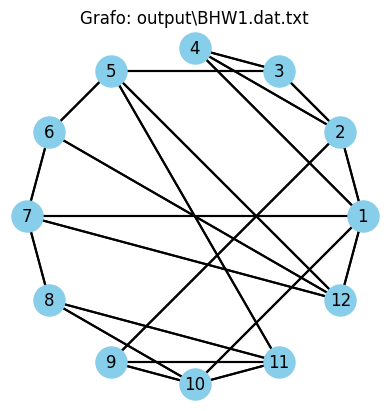

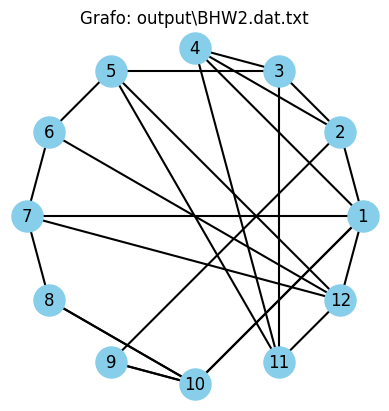

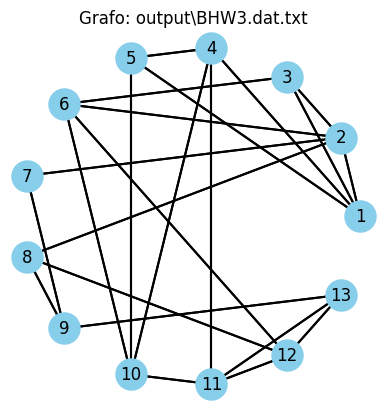

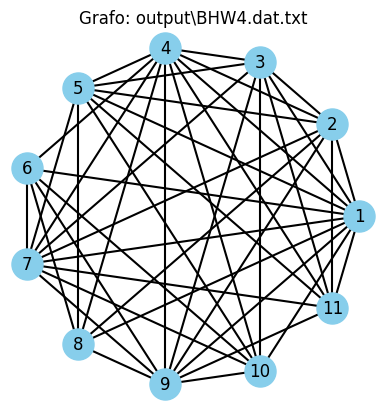

In [3]:
import matplotlib.pyplot as plt
import math
import os

def carregar_grafo(caminho):
    with open(caminho, 'r') as f:
        linhas = f.readlines()
        vertices = list(map(int, linhas[0].split(':')[1].split()))
        arestas_raw = linhas[1].split(':')[1].split()
        arestas = [tuple(map(int, a.strip('()').split(','))) for a in arestas_raw]
    return vertices, arestas

def posicionar_vertices(vertices):
    n = len(vertices)
    pos = {}
    for i, v in enumerate(vertices):
        angle = 2 * math.pi * i / n
        pos[v] = (math.cos(angle), math.sin(angle))
    return pos

def desenhar_grafo(vertices, arestas, pos, titulo):
    fig, ax = plt.subplots()
    for origem, destino in arestas:
        x_vals = [pos[origem][0], pos[destino][0]]
        y_vals = [pos[origem][1], pos[destino][1]]
        ax.plot(x_vals, y_vals, 'k-', zorder=1)
    for v in vertices:
        x, y = pos[v]
        ax.scatter(x, y, s=500, c='skyblue', zorder=2)
        ax.text(x, y, str(v), ha='center', va='center', fontsize=12, zorder=3)

    ax.set_aspect('equal')
    ax.axis('off')
    plt.title(titulo)
    plt.show()

# ======= LISTA DE ARQUIVOS .txt ==========
arquivos = [
    "output\BHW1.dat.txt",
    "output\BHW2.dat.txt",
    "output\BHW3.dat.txt",
    "output\BHW4.dat.txt"

]

# ======= LOOP PARA LER E DESENHAR ============
for arquivo in arquivos:
    if not os.path.exists(arquivo):
        print(f"Arquivo não encontrado: {arquivo}")
        continue
    vertices, arestas = carregar_grafo(arquivo)
    pos = posicionar_vertices(vertices)
    desenhar_grafo(vertices, arestas, pos, f"Grafo: {arquivo}")
